# Publish Me: Release Assistant
The purpose of this project is to take published books sales data, then to sort it by sub-genre to allow self-publish authors to determine the highest probability for successful sales of their novel based on genre and sub-genre. The long term goal would be to design a web based dashboard that will allow the author search or filter for their sub-genre for sales numbers and to cross check with planned release dates of similar books that will be published by traditional publishing houses to prevent lower sales by releasing self-published books at or around the same time of more well known or popular authors.

### Dataset locations: 
Books_Data_Clean.csv (https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings)

book_details.csv (https://www.kaggle.com/datasets/evilspirit05/comprehensive-goodreads-book-dataset?resource=download)   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
from collections import Counter
import string
import sqlite3
from matplotlib.ticker import FuncFormatter
import seaborn as sn
from textwrap import wrap
import zipfile


## Data Collection and Loading: 

#### Load Data: I used Pandas to load the datasets via a CSV file. 

#### Initial Check: Please see below for the initial disply of the dataset. The the first few rows and basic information about the dataset, noting column names, types, and/or missing values.

#### Selection Options:

⁜ With exploring the intitial datasets, I was able to determine which columns would not be useful for the scope of the project. Please see the Cleaning and Analysis section for details on how the data was cleaned. 



In [2]:
BS = pd.read_csv("Books_Data_Clean.csv")
# read the dataset using the compression zip
#BS = pd.read_csv('Books_Data_Clean.zip',compression='zip')
BS

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


In [3]:
BS.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [4]:
BS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [5]:
Book_Details = pd.read_csv ("book_details.csv")
Book_Details

,title,url,description,genres
0,To Kill a Mockingbird,https://www.goodreads.com/book/show/2657.To_Ki...,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193.Harr...,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,Pride and Prejudice,https://www.goodreads.com/book/show/1885.Pride...,Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical..."
3,The Diary of a Young Girl,https://www.goodreads.com/book/show/48855.The_...,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Animal Farm,https://www.goodreads.com/book/show/170448.Ani...,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."
...,...,...,...,...
6308,The Blank Slate: The Modern Denial of Human Na...,https://www.goodreads.com/book/show/5752.The_B...,"In The Blank Slate, Steven Pinker explores the...","['Psychology', 'Science', 'Nonfiction', 'Philo..."
6309,La leyenda del Rey Errante,https://www.goodreads.com/book/show/1146745.La...,"Cuenta la historia de Walid, un príncipe árabe...","['Fantasy', 'Historical Fiction', 'Fiction', '..."
6310,"This Way for the Gas, Ladies and Gentlemen",https://www.goodreads.com/book/show/228244.Thi...,Tadeusz Borowski’s concentration camp stories ...,"['History', 'Short Stories', 'Holocaust', 'Non..."
6311,The Warded Man,https://www.goodreads.com/book/show/3428935-th...,"As darkness falls after sunset, the corelings ...","['Fantasy', 'Fiction', 'Epic Fantasy', 'High F..."


In [6]:
Book_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6313 entries, 0 to 6312
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        6313 non-null   object
 1   url          6313 non-null   object
 2   description  6274 non-null   object
 3   genres       6313 non-null   object
dtypes: object(4)
memory usage: 197.4+ KB


In [7]:
Book_Details.describe()

,title,url,description,genres
count,6313,6313,6274,6313
unique,6183,6313,6252,5889
top,The Hunger Games,https://www.goodreads.com/book/show/18361450-r...,Lost in Yaba is a true story about an expat wh...,[]
freq,3,1,2,163


# Data Cleaning: 

⁜ From 'Books_Data_Clean', I dropped columns that were not needed for the analysis (index, language_code, Author_Rating, Book_average_rating, Book_ratings_count).

⁜ The columns that I focused in 'Books_Data_Clean' were Book_Name, Author, genre, gross_sales, publisher_revenue, sale_price, sales_rank, Pulisher_ and units_sold.  I later dropped sales rank, sales price and units sold to focus on total sales.

⁜ From 'Book_Details', I adjusted column names, dropped rows with Nan values, separated the genres column into additional columns which would need to be sorted and prioritized for the genre/sub-genres/tropes, dropped unnecessary columns. 

⁜ Prior to joining the data sets, I changed strings to upper and replaced special characters with ' ' to facilitate easier joining of the datasets on the Book_Name column. 

⁜ I used an inner join to combine the datasets 'Books_Data_Clean' with 'book_details' by book Title. Any books listed in the combined dataset with null values in author were dropped with the inner join to make the dataset more concise with the sales data. 

⁜ In order to differentiate genre into sub-genre, I wrote functions to find specific text values in the rows to make a Master_Genre column (Fiction or NonFiction). Then used a similar function to search a list for Fiction and NonFiction Genres (ex. Romance, Sci-Fi, Biography, etc.) for a Master_Sub_Genre column. After making each new column I scrubed the rows for those values and replaced them with nan to avoid "counting" the values again.

⁜ I also wrote script to make a list of the remaining sub-genres/trope and sorted the list by value counts. I used this list to assess each row for the reamining sub-genres/tropes based on values to build additional columns in order of trope values, again scrubbing the rows for the matching value to prevent recounting. Then dropped the columns with nan values. 

In [8]:
#dropping columns I will not be utilizing for this project. 
BS = BS.drop(['index','language_code','Author_Rating','Book_average_rating','Book_ratings_count'], axis=1)

# Replace spaces with underscores in column names
BS.columns = BS.columns.str.replace(' ', '_')

# change string to upper single column
#BS['Book Name'] = BS['Book Name'].str.upper() 

# change string to upper for multiple columns
BS = BS.assign(Book_Name=BS['Book_Name'].str.upper(), 
               Author=BS['Author'].str.upper(),
               genre=BS['genre'].str.upper(),
               Publisher_=BS['Publisher_'].str.upper())

#remove special characters from single column
BS['Book_Name'] = BS['Book_Name'].str.replace('\W', ' ', regex=True)
BS['Author'] = BS['Author'].str.replace('\W', ' ', regex=True)
BS['genre'] = BS['genre'].str.replace('\W', ' ', regex=True)
BS['Publisher_'] = BS['Publisher_'].str.replace('\W', ' ', regex=True)
# replace special character with ' ' for all columns
#df = df.replace(r'[^0-9a-zA-Z ]', '', regex=True).replace("'", '')

#replace genre fiction with fiction
BS['genre'] = BS['genre'].replace('GENRE FICTION','FICTION')
BS.head(3)


,Publishing_Year,Book_Name,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,1975.0,BEOWULF,UNKNOWN SEAMUS HEANEY,FICTION,34160.0,20496.0,4.88,1,HARPERCOLLINS PUBLISHERS,7000
1,1987.0,BATMAN YEAR ONE,FRANK MILLER DAVID MAZZUCCHELLI RICHMOND LEW...,FICTION,12437.5,7462.5,1.99,2,HARPERCOLLINS PUBLISHERS,6250
2,2015.0,GO SET A WATCHMAN,HARPER LEE,FICTION,47795.0,28677.0,8.69,3,AMAZON DIGITAL SERVICES INC,5500


In [9]:
#Filter for specific values may use further down??
# # Sample DataFrame
# #data = {'Title': ['Movie1', 'Movie2', 'Movie3', 'Movie4'],
# #        'Genres': ['Horror, Thriller', 'Action, Comedy', 'Horror, Vampires', 'Drama, Vampires']}

# Book_Details = pd.DataFrame(Book_Details)

# # Filtering rows that contain either "Horror" or "Vampires"
# filtered_df = Book_Details[Book_Details['genres'].apply(lambda x: any(genre in x for genre in ['Horror', 'Vampires']))]

# print(filtered_df)

In [10]:
Book_Details = Book_Details.drop(['url','description'], axis=1)
#remove special characters from title and genres columns, then convert strings to upper
# #Book_Details['genres'] = Book_Details['genres'].str.replace('[\[\]]', '', regex=True)
Book_Details['title'] = Book_Details['title'].str.replace('\W', ' ', regex=True)
Book_Details['genres'] = Book_Details['genres'].str.replace("'", '', regex=True)

# change string to upper for title & genres column
Book_Details = Book_Details.assign(title=Book_Details['title'].str.upper()) 
Book_Details = Book_Details.assign(genres=Book_Details['genres'].str.upper())
#split genres column into multiple sub-genre columns 
Book_Details[['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3','Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7','Sub_Genre_8',
              'Sub_Genre_9','Sub_Genre_10']] = Book_Details['genres'].str.split(',', expand=True)

# Drop rows with any NaN values
Book_Details = Book_Details.dropna()

#remove all special characters ([],'') from Sub_Genre columns and drop genres column
##specific code for removing [] from code below:
#Book_Details['Sub_Genre_1'] = Book_Details['Sub_Genre_1'].str.replace("\[",'',regex=True)
#Book_Details['Sub_Genre_10'] = Book_Details['Sub_Genre_10'].str.replace("\]",'',regex=True)

Book_Details['Sub_Genre_1'] = Book_Details['Sub_Genre_1'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_2'] = Book_Details['Sub_Genre_2'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_3'] = Book_Details['Sub_Genre_3'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_4'] = Book_Details['Sub_Genre_4'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_5'] = Book_Details['Sub_Genre_5'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_6'] = Book_Details['Sub_Genre_6'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_7'] = Book_Details['Sub_Genre_7'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_8'] = Book_Details['Sub_Genre_8'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_9'] = Book_Details['Sub_Genre_9'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_10'] = Book_Details['Sub_Genre_10'].str.replace("\W", '', regex=True)

Book_Details = Book_Details.drop('genres', axis=1)

# Renaming title column to match BS dataset. Will utilize this column to join the data sets. 
Book_Details.rename(columns={'title': 'Book_Name'}, inplace=True)

Book_Details.head(3)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10
0,TO KILL A MOCKINGBIRD,CLASSICS,FICTION,HISTORICALFICTION,SCHOOL,LITERATURE,YOUNGADULT,HISTORICAL,READFORSCHOOL,NOVELS,HIGHSCHOOL
1,HARRY POTTER AND THE PHILOSOPHER S STONE,FANTASY,FICTION,YOUNGADULT,MAGIC,CHILDRENS,MIDDLEGRADE,CLASSICS,ADVENTURE,AUDIOBOOK,SCIENCEFICTIONFANTASY
2,PRIDE AND PREJUDICE,CLASSICS,FICTION,ROMANCE,HISTORICALFICTION,LITERATURE,HISTORICAL,AUDIOBOOK,NOVELS,HISTORICALROMANCE,ADULT


In [11]:
#assess columns for Dtypes
Book_Details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5436 entries, 0 to 6312
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Book_Name     5436 non-null   object
 1   Sub_Genre_1   5436 non-null   object
 2   Sub_Genre_2   5436 non-null   object
 3   Sub_Genre_3   5436 non-null   object
 4   Sub_Genre_4   5436 non-null   object
 5   Sub_Genre_5   5436 non-null   object
 6   Sub_Genre_6   5436 non-null   object
 7   Sub_Genre_7   5436 non-null   object
 8   Sub_Genre_8   5436 non-null   object
 9   Sub_Genre_9   5436 non-null   object
 10  Sub_Genre_10  5436 non-null   object
dtypes: object(11)
memory usage: 509.6+ KB


In [12]:
#Join datasets using Book_Name as primary key
# using .merge() function
Full_Book_Details = pd.merge(Book_Details, BS, on='Book_Name')

# search for column Dtypes and null values. 
Full_Book_Details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Book_Name          675 non-null    object 
 1   Sub_Genre_1        675 non-null    object 
 2   Sub_Genre_2        675 non-null    object 
 3   Sub_Genre_3        675 non-null    object 
 4   Sub_Genre_4        675 non-null    object 
 5   Sub_Genre_5        675 non-null    object 
 6   Sub_Genre_6        675 non-null    object 
 7   Sub_Genre_7        675 non-null    object 
 8   Sub_Genre_8        675 non-null    object 
 9   Sub_Genre_9        675 non-null    object 
 10  Sub_Genre_10       675 non-null    object 
 11  Publishing_Year    675 non-null    float64
 12  Author             675 non-null    object 
 13  genre              675 non-null    object 
 14  gross_sales        675 non-null    float64
 15  publisher_revenue  675 non-null    float64
 16  sale_price         675 non

In [13]:
# Drop rows with any NaN values
Full_Book_Details = Full_Book_Details.dropna()

#drop genre & sales_rank
Full_Book_Details = Full_Book_Details.drop(['sales_rank','genre'], axis=1)

In [14]:
# make a master list of genres/sub-genres from sub_genre columns (1-10) with the intent to use the masterlist to sort/build columns based 
# on value counts of the list.
columns = ['Sub_Genre_1','Sub_Genre_2','Sub_Genre_3','Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7','Sub_Genre_8','Sub_Genre_9',
           'Sub_Genre_10']
master = []
for column in columns:
    x = Full_Book_Details[column]
    master.append(x)
master = pd.concat(master, ignore_index=True)
master_unique = master.unique()

master_unique.tolist().__len__()

master.value_counts().head(15)


FICTION              577
AUDIOBOOK            326
FANTASY              288
YOUNGADULT           211
ADULT                192
CLASSICS             184
NOVELS               180
ROMANCE              173
CONTEMPORARY         163
MYSTERY              153
ADVENTURE            146
HISTORICALFICTION    130
SCIENCEFICTION       117
THRILLER             115
LITERATURE           109
Name: count, dtype: int64

#### Analysis note: 
⁜ I was unable to use the above list as intended, as audio books was higer on the list and this is not a genre or trope but a format for the books. Also, several genres cross over such as young adult and fantasy into other genres, which would have skewed the data when analyzing the main genres for fiction. 

⁜ I later utilized a list from https://nextnewbooks.com/book-genres-explained-complete-list/ to determine the base fiction and nonfiction genres further down in the code. 

In [15]:
# map rows for the genres, use for loop for fiction and nonfiction to move to a new master genre column

# Function to determine the genre
def determine_master_genre(row):
    if 'FICTION' in row.values:
        return 'FICTION'
    elif 'NONFICTION' in row.values:
        return 'NONFICTION'
    else:
        return 'OTHER'

# Apply the function to each row
Full_Book_Details['Master_Genre'] = Full_Book_Details.apply(determine_master_genre, axis=1)

#Full_Book_Details
# map rows for the next largest genre, using for loop to move those to a new sub-genre column

In [16]:
# Query for value counts to ascertain for any outliers: 
Master_Genre1 = Full_Book_Details['Master_Genre'].value_counts() 
Master_Genre1

Master_Genre
FICTION       577
NONFICTION     93
OTHER           5
Name: count, dtype: int64

In [17]:
#identify OTHER master genres in order to categorize the outliers as fiction or nonfiction: 
specific_value = 'OTHER'
rows_with_value = Full_Book_Details[Full_Book_Details['Master_Genre']==specific_value]
rows_with_value

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold,Master_Genre
346,HEX HALL,YOUNGADULT,FANTASY,PARANORMAL,MAGIC,ROMANCE,VAMPIRES,WITCHES,SUPERNATURAL,URBANFANTASY,DEMONS,2010.0,RACHEL HAWKINS,526.68,0.000,3.99,AMAZON DIGITAL SERVICES INC,50544,OTHER
528,TORMENT,VAMPIRES,PARANORMAL,HORROR,YOUNGADULT,FANTASY,ROMANCE,WITCHES,DEMONS,ANGELS,PARANORMALROMANCE,2010.0,LAUREN KATE,5705.70,0.000,3.99,AMAZON DIGITAL SERVICES INC,1430,OTHER
590,FOREVER,YOUNGADULT,ROMANCE,CONTEMPORARY,AMISH,CONTEMPORARYROMANCE,TEEN,YOUNGADULTCONTEMPORARY,REALISTICFICTION,NEWADULT,LOVE,2011.0,MAGGIE STIEFVATER,827.86,496.716,7.81,PENGUIN GROUP USA LLC,106,OTHER
592,BEHIND CLOSED DOORS,ROMANCE,CONTEMPORARYROMANCE,CONTEMPORARY,SUSPENSE,MYSTERY,ADULT,ROMANTICSUSPENSE,AMAZON,MYSTERYTHRILLER,MFROMANCE,2016.0,B A PARIS,919.13,551.478,8.59,PENGUIN GROUP USA LLC,107,OTHER
610,EFFORTLESS,ROMANCE,NEWADULT,CONTEMPORARYROMANCE,CONTEMPORARY,MUSIC,COLLEGE,YOUNGADULT,ADULT,CHICKLIT,EROTICA,2011.0,S C STEPHENS,160.38,96.228,0.99,AMAZON DIGITAL SERVICES INC,4374,OTHER


In [18]:
#Assessment of all outliers are fiction as a master genre. will replace OTHER with FICTION
Full_Book_Details['Master_Genre'] = Full_Book_Details['Master_Genre'].replace('OTHER','FICTION')

#Assessment of columns shows CONTEMPORAYROMANCE and CONTEMPORARY with romance in rows. 
# will replace compund word with "Contemporary"
Full_Book_Details.replace('CONTEMPORARYROMANCE', 'CONTEMPORARY', inplace=True)
Full_Book_Details.replace('PARANORMALROMANCE', 'PARANORMAL', inplace=True)

#Confriming value counts as fiction or nonfiction for all entries:
Master_Genre2 = Full_Book_Details['Master_Genre'].value_counts()
Master_Genre2

Master_Genre
FICTION       582
NONFICTION     93
Name: count, dtype: int64

In [19]:
#replace FICTION in Sub_Genre1 to Sub_Genre10 with a null value, and NONFICTION in the same columns with a null value
# exclude_column = Full_Book_Details['Master_Genre']

Full_Book_Details = Full_Book_Details.apply(lambda x:x.replace(['FICTION', 'NONFICTION'], np.nan) if x.name != 'Master_Genre' else x)
Full_Book_Details.head(3)


,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold,Master_Genre
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,CHILDRENS,NaN,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,11.47,RANDOM HOUSE LLC,453,FICTION
1,THE VELVETEEN RABBIT,CLASSICS,CHILDRENS,NaN,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,6.54,RANDOM HOUSE LLC,3333,FICTION
2,LOVE YOU FOREVER,PICTUREBOOKS,CHILDRENS,NaN,CLASSICS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,0.99,AMAZON DIGITAL SERVICES INC,1323,FICTION


In [20]:
#scrub the rows for the main sub-genres and apply those to a new Master_Sub_Genre column
#FICTION subs: Literary Fiction, Historical Fiction, Science Fiction, Fantasy, Horror, Romance, Mystery, Thriller, Crime, Action, Adventure,
# Young Adult, Childrens, Contemporary
#NONFICTION subs: Biography, Autobiography, Memoir, True Crime, Self-Help, History, Religion, Science

#Replace compunded strings with seperated words
Full_Book_Details.replace('SCIENCEFICTION', 'SCIENCE FICTION', inplace=True)
Full_Book_Details.replace('LITERARYFICTION', 'LITERARY FICTION', inplace=True)
Full_Book_Details.replace('HISTORICALFICTION', 'HISTORICAL', inplace=True)
Full_Book_Details.replace('SHORTSTORIES', 'SHORT STORIES', inplace=True)
Full_Book_Details.replace('PICTUREBOOKS', 'PICTURE BOOKS', inplace=True)
Full_Book_Details.replace('MIDDLEGRADE', 'MIDDLE GRADE', inplace=True)
Full_Book_Details.replace('YOUNGADULT', 'YOUNG ADULT', inplace=True)
Full_Book_Details.replace('URBANFANTASY', 'URBAN', inplace=True)
Full_Book_Details.replace('MAGICALREALISM', 'MAGICAL REALISM', inplace=True)
Full_Book_Details.replace('MYSTERYTHRILLER', 'MYSTERY THRILLER', inplace=True)
Full_Book_Details.replace('YOUNGADULTFANTASY', 'YOUNG ADULT', inplace=True)
Full_Book_Details.replace('ADULTFICTION', 'ADULT', inplace=True)
Full_Book_Details.replace('SHAPESHIFTERS', 'SHAPE SHIFTERS', inplace=True)
Full_Book_Details.replace('REALISTICFICTION', 'REALISTIC', inplace=True)
Full_Book_Details.replace('TRUECRIME', 'TRUE CRIME', inplace=True)
Full_Book_Details.replace('YOUNGADULTCONTEMPORARY', 'CONTEMPORARY', inplace=True)
Full_Book_Details.replace('YOUNGADULTROMANCE', 'YOUNG ADULT', inplace=True)
Full_Book_Details.replace('COMINGOFAGE', 'COMING OF AGE', inplace=True)
Full_Book_Details.replace('HIGHFANTASY', 'HIGH', inplace=True)
Full_Book_Details.replace('EPICFANTACY', 'EPIC', inplace=True)
Full_Book_Details.replace('SCIENCEFICTIONFANTASY', 'SCIENCE FICTION', inplace=True)		
Full_Book_Details.replace('19THCENTURY', '19TH CENTURY', inplace=True)	
Full_Book_Details.replace('19THCENTURY', '19TH CENTURY', inplace=True)	
Full_Book_Details.replace('BRITISHLITERATURE', 'BRITISH LITERATURE', inplace=True)	
Full_Book_Details.replace('READFORSCHOOL', 'READ FOR SCHOOL', inplace=True)	

	
# Function to use a list of fiction and nonfiction genres to determine the main genre of the books on the list, add this genre to a new 
# column
def determine_genre(row, value_list=list):
    for value in list: 
        if value in row.values:
            return value
    else: 
        return None    

list = ('BIOGRAPHY','AUTOBIOGRAPHY','MEMOIR','SELFHELP','COOKBOOKS','SCIENCE','HISTORY','ROMANCE','CHILDRENS','MYSTERY','HORROR','SCIENCE FICTION','LITERARY FICTION','HISTORICAL','ACTION','FANTASY','CLASSICS','CONTEMPORARY','THRILLER','RELIGION')
  
# Apply the function to each row
Full_Book_Details['Master_Sub_Genre'] = Full_Book_Details.apply(determine_genre, axis=1)

#Full_Book_Details
    


In [21]:
#Ran value_counts for Master_Sub_Genre to look for any "OTHER" that would need addressed. 
Master_Sub_Genre2 = Full_Book_Details['Master_Sub_Genre'].value_counts()
Master_Sub_Genre2

# No "OTHER" found, see below. 

Master_Sub_Genre
ROMANCE             172
MYSTERY             115
CHILDRENS            87
SCIENCE FICTION      69
BIOGRAPHY            59
LITERARY FICTION     53
HORROR               33
HISTORICAL           29
SELFHELP             13
SCIENCE              10
CLASSICS              8
HISTORY               8
CONTEMPORARY          7
FANTASY               6
MEMOIR                4
COOKBOOKS             1
RELIGION              1
Name: count, dtype: int64

In [22]:
#replace FICTION master_sub_genres in Sub_Genre1 to Sub_Genre10 with a null value, and NONFICTION master_sub_genres in the same columns 
# with a null value
#FICTION subs: Literary Fiction, Historical Fiction, Science Fiction, Fantasy, Horror, Romance, Mystery, Thriller, Crime, Childrens, 
# Contemporary
#NONFICTION subs: Biography, Autobiography, Memoir, Self-Help, History, Religion, Science


#IF Master_Sub_Genre value matches other values in the row, replace other values with null 

# exclude_column = Full_Book_Details['Master_Sub_Genre']
# Full_Book_Details = Full_Book_Details.apply(lambda x:x.replace(['FICTION', 'NONFICTION'], np.nan) if x.name != 'Master_Genre' else x)
# Full_Book_Details

def replace_with_nan(Full_Book_Details, target_columns, master_column='Master_Sub_Genre'):
    
    for index, row in Full_Book_Details.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details.at[index, col] = np.nan
    return Full_Book_Details

Full_Book_Details = pd.DataFrame(Full_Book_Details)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan(Full_Book_Details.copy(), target_cols)


#Full_Book_Details_modified.head(2)
Full_Book_Details_modified

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold,Master_Genre,Master_Sub_Genre
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICAL,NaN,NaN,YOUNG ADULT,HISTORICAL,MIDDLE GRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,11.47,RANDOM HOUSE LLC,453,FICTION,CHILDRENS
1,THE VELVETEEN RABBIT,CLASSICS,NaN,NaN,PICTURE BOOKS,FANTASY,ANIMALS,YOUNG ADULT,JUVENILE,SHORT STORIES,MIDDLE GRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,6.54,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS
2,LOVE YOU FOREVER,PICTURE BOOKS,NaN,NaN,CLASSICS,FAMILY,LOVE,KIDS,REALISTIC,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,0.99,AMAZON DIGITAL SERVICES INC,1323,FICTION,CHILDRENS
3,JONATHAN LIVINGSTON SEAGULL,NaN,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,NaN,LITERATURE,NOVELS,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,6751.47,0.000,4.99,AMAZON DIGITAL SERVICES INC,1353,FICTION,SELFHELP
4,THE COMPLETE SHERLOCK HOLMES,CLASSICS,NaN,NaN,CRIME,SHORT STORIES,DETECTIVE,LITERATURE,AUDIOBOOK,MYSTERY THRILLER,HISTORICAL,1894.0,ARTHUR CONAN DOYLE,3180.02,1908.012,7.99,PENGUIN GROUP USA LLC,398,FICTION,MYSTERY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,THE AMITYVILLE HORROR,HORROR,NaN,PARANORMAL,THRILLER,CLASSICS,AUDIOBOOK,SUPERNATURAL,TRUE CRIME,NaN,GHOSTS,1977.0,JAY ANSON,1191.26,714.756,8.89,HACHETTE BOOK GROUP,52056,FICTION,MYSTERY
671,THE BONE CLOCKS,NaN,FANTASY,SCIENCE FICTION,LITERARY FICTION,MAGICAL REALISM,CONTEMPORARY,NaN,DYSTOPIA,AUDIOBOOK,ADULT,2014.0,DAVID MITCHELL,781.96,469.176,6.92,RANDOM HOUSE LLC,2862,FICTION,MYSTERY
672,RULES OF CIVILITY,NaN,HISTORICAL,HISTORICAL,NEWYORK,NaN,AUDIOBOOK,BOOKCLUB,ADULT,NOVELS,ADULT,2011.0,AMOR TOWLES,712.81,427.686,5.99,PENGUIN GROUP USA LLC,40824,FICTION,LITERARY FICTION
673,THE BLACK DAHLIA,NaN,NaN,CRIME,NOIR,HISTORICAL,TRUE CRIME,THRILLER,MYSTERY THRILLER,DETECTIVE,HISTORICAL,1987.0,JAMES ELLROY,1088.91,653.346,9.99,RANDOM HOUSE LLC,4280,FICTION,MYSTERY


In [23]:
#For loop to determine master list of remaining sub-genres/tropes. Plan to utilize list in assigning tropes based on descending value 
# counts.
master_1 = []
for column in columns:
    x = Full_Book_Details_modified[column]
    master_1.append(x)
master_1 = pd.concat(master_1, ignore_index=True)
master_1_unique = master.unique()

master_1_unique.tolist().__len__()

310

In [24]:
master_1.value_counts().head(10)


AUDIOBOOK       326
ADULT           299
FANTASY         282
YOUNG ADULT     263
CONTEMPORARY    197
NOVELS          180
HISTORICAL      180
CLASSICS        176
ADVENTURE       146
THRILLER        115
Name: count, dtype: int64

In [25]:
# print all unique value counts into a list

masterlist_1 = master_1.value_counts().index.tolist()


In [26]:
# Function to use masterlist_1 to determine the trope with highest value and add this trope to a new column, ignoring AUDIOBOOK as this 
# is not a trope but a book format
def determine_trope(row, value_list=masterlist_1, master_column='Master_Sub_Genre', ignore_value='AUDIOBOOK'):
    for value in masterlist_1: 
        master_value = row[master_column]
        if value != ignore_value and value in row.values:
            return value
    else: 
        return None    

# mastertrope = masterlist_1
ignore_value = 'AUDIOBOOK' 
  
# Apply the function to each row
Full_Book_Details_modified['Trope_1'] = Full_Book_Details_modified.apply(determine_trope, axis=1)

# Full_Book_Details_modified.head(2)

#replace Trope_1 vaules in Sub_Genre 1-10 columns with nan, then repeat the process with Trope_2, etc. 
def replace_with_nan1(Full_Book_Details_modified, target_columns, master_column='Trope_1'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8',
               'Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan1(Full_Book_Details_modified.copy(), target_cols)


#Full_Book_Details_modified.head(2)

In [27]:
# Full_Book_Details_modified.head(2)

# Repeat of the above Function with modifications, to use masterlist_1 to determine the trope with highest value and add this trope to a 
# new column (Trope_2), ignoring AUDIOBOOK as this is not a trope but a book format
def determine_trope2(row, target_columns=target_cols, value_list=masterlist_1, ignore_value='AUDIOBOOK'):
    for col in target_columns: 
        if row[col] in value_list and row[col] != ignore_value:
            return row[col]    

ignore_value = 'AUDIOBOOK' 
  
# Apply the function to each row
Full_Book_Details_modified['Trope_2'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

# Full_Book_Details_modified.head(2)

#Repeat of the above function to replace Trope_2 vaules in Sub_Genre 1-10 columns with nan, with modification to ensure new columns are 
# not affected. 
def replace_with_nan2(Full_Book_Details_modified, target_columns, master_column='Trope_2'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8',
               'Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan2(Full_Book_Details_modified.copy(), target_cols)


# Full_Book_Details_modified.head(2)


In [28]:
# # Repeat Function determine_trope2 etc. to further drill down tropes for each book. 
# def determine_trope2(row, target_columns=target_cols, value_list=masterlist_1, ignore_value='AUDIOBOOK'):
#     for col in target_columns: 
#         if row[col] in value_list and row[col] != ignore_value:
#             return row[col]
#     else: 
#         return None    

# ignore_value = 'AUDIOBOOK' 
  
# Apply the function to each row
Full_Book_Details_modified['Trope_3'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

#replace Trope_3 vaules if Sub_Genre 1-10 columns with nan.
def replace_with_nan3(Full_Book_Details_modified, target_columns, master_column='Trope_3'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8',
               'Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan3(Full_Book_Details_modified.copy(), target_cols)


# Full_Book_Details_modified.head(2)

In [29]:
# # Repeat Function determine_trope2 to further drill down tropes for each book. 

Full_Book_Details_modified['Trope_4'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

#replace Trope_4 vaules if Sub_Genre 1-10 columns with nan. 
def replace_with_nan4(Full_Book_Details_modified, target_columns, master_column='Trope_4'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8',
               'Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan4(Full_Book_Details_modified.copy(), target_cols)


# Full_Book_Details_modified.head(2)

In [30]:
# # Repeat Function determine_trope2 to further drill down tropes for each book. 

Full_Book_Details_modified['Trope_5'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

#replace Trope_5 vaules if Sub_Genre 1-10 columns with nan.
def replace_with_nan5(Full_Book_Details_modified, target_columns, master_column='Trope_5'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8',
               'Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan5(Full_Book_Details_modified.copy(), target_cols)


# Full_Book_Details_modified.head(2)

In [31]:
# # Repeat Function determine_trope2 to further drill down tropes for each book. 
Full_Book_Details_modified['Trope_6'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

#replace Trope_5 vaules if Sub_Genre 1-10 columns with nan. 
def replace_with_nan6(Full_Book_Details_modified, target_columns, master_column='Trope_6'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 
               'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan6(Full_Book_Details_modified.copy(), target_cols)


# Full_Book_Details_modified.head(2)

In [32]:
# # Repeat Function determine_trope2 to further drill down tropes for each book. 
Full_Book_Details_modified['Trope_7'] = Full_Book_Details_modified.apply(determine_trope2, axis=1)

#replace Trope_7 vaules if Sub_Genre 1-10 columns with nan. 
def replace_with_nan7(Full_Book_Details_modified, target_columns, master_column='Trope_7'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 
               'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan7(Full_Book_Details_modified.copy(), target_cols)


# Full_Book_Details_modified.head(2)

In [33]:
# # Modification of the Function determine_trope2 to finished out the Sub_Genre columns, adding Audiobook back in, in order to get sales 
# numbers for this format. Which would be useful for self-publish authors to plan for producing this format. 
def determine_trope3(row, target_columns=target_cols, value_list=masterlist_1):
    for col in target_columns: 
        if row[col] in value_list:
            return row[col]
    else: 
        return None    

# ignore_value = 'AUDIOBOOK' 
# Apply the function to each row
Full_Book_Details_modified['Trope_8'] = Full_Book_Details_modified.apply(determine_trope3, axis=1)

#replace Trope_8 vaules if Sub_Genre 1-10 columns with nan, then repeat the process with Trope_2, etc. 
def replace_with_nan8(Full_Book_Details_modified, target_columns, master_column='Trope_8'):
    for index, row in Full_Book_Details_modified.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details_modified.at[index, col] = np.nan
    return Full_Book_Details_modified

#columns=('Master_Sub_Genre','Trope_1','Trope_2')
Full_Book_Details_modified = pd.DataFrame(Full_Book_Details_modified)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7',
               'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan8(Full_Book_Details_modified.copy(), target_cols)


# Full_Book_Details_modified.head(4)

In [34]:
#Ran value_counts for Trope_8 to look for any none values 
Trope_8 = Full_Book_Details_modified['Trope_8'].value_counts()
Trope_8

Trope_8
AUDIOBOOK    326
NOVELS        14
JUVENILE      11
COMEDY         8
SCHOOL         7
            ... 
AVIATION       1
EROTICA        1
BIRDS          1
COUNTING       1
ESPIONAGE      1
Name: count, Length: 103, dtype: int64

In [35]:
#drop genre, sales_price, sales_rank. Then save to csv file
Full_Book_Details_mod2 = Full_Book_Details_modified.drop(['Sub_Genre_1','Sub_Genre_2','Sub_Genre_3','Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7','Sub_Genre_8','Sub_Genre_9','Sub_Genre_10'], axis=1)
Full_Book_Details_mod2.to_csv('Full_Book_Details_mod2.csv')
# Full_Book_Details_mod2.head(3)

In [36]:
#make new dataset of fiction:Romance by dropping rows that do not equal Romance in Master_Sub_Genre column
Fiction_Romance = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Sub_Genre'] == 'ROMANCE']
Fiction_Romance

,Book_Name,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6,Trope_7,Trope_8
5,THE GIFT OF THE MAGI,1905.0,O HENRY LISBETH ZWERGER,951.23,570.738,8.89,SIMON AND SCHUSTER DIGITAL SALES INC,107,FICTION,ROMANCE,YOUNG ADULT,CLASSICS,SHORT STORIES,CHRISTMAS,LITERATURE,HOLIDAY,SCHOOL,PICTURE BOOKS
7,TUCK EVERLASTING,1975.0,NATALIE BABBITT,3582.00,2149.200,1.99,AMAZON DIGITAL SERVICES INC,1800,FICTION,ROMANCE,FANTASY,CLASSICS,YOUNG ADULT,CHILDRENS,MIDDLE GRADE,SCHOOL,HISTORICAL,READ FOR SCHOOL
8,THE MISTS OF AVALON,1982.0,MARION ZIMMER BRADLEY,1157.31,694.386,0.99,AMAZON DIGITAL SERVICES INC,1169,FICTION,ROMANCE,FANTASY,HISTORICAL,ARTHURIAN,MYTHOLOGY,CLASSICS,SCIENCE FICTION,MAGIC,None
53,HOWL S MOVING CASTLE,1986.0,DIANA WYNNE JONES,950.82,0.000,2.99,AMAZON DIGITAL SERVICES INC,318,FICTION,ROMANCE,FANTASY,YOUNG ADULT,MIDDLE GRADE,MAGIC,CHILDRENS,CLASSICS,ADVENTURE,AUDIOBOOK
55,MIDDLEMARCH,1871.0,GEORGE ELIOT MICHEL FABER,186.12,0.000,0.99,AMAZON DIGITAL SERVICES INC,5076,FICTION,ROMANCE,NOVELS,CLASSICS,HISTORICAL,LITERATURE,19TH CENTURY,VICTORIAN,BRITISH LITERATURE,AUDIOBOOK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,EVERYTHING EVERYTHING,2015.0,NICOLA YOON DAVID YOON,331.89,0.000,2.99,AMAZON DIGITAL SERVICES INC,4360,FICTION,ROMANCE,YOUNG ADULT,CONTEMPORARY,REALISTIC,TEEN,COMING OF AGE,None,None,AUDIOBOOK
660,GONE,2008.0,MICHAEL GRANT,3678.30,2206.980,5.49,AMAZON DIGITAL SERVICES INC,670,FICTION,ROMANCE,FANTASY,YOUNG ADULT,PARANORMAL,SUPERNATURAL,MYSTERY,TEEN,URBAN,None
661,A BEND IN THE ROAD,2001.0,NICHOLAS SPARKS,1353.20,811.920,1.99,HARPERCOLLINS PUBLISHERS,680,FICTION,ROMANCE,ADULT,CHICKLIT,CONTEMPORARY,MYSTERY,DRAMA,LOVE,None,None
664,STONE OF TEARS,1995.0,TERRY GOODKIND,1111.12,666.672,7.31,PENGUIN GROUP USA LLC,4104,FICTION,ROMANCE,ADULT,FANTASY,EPICFANTASY,HIGH,SCIENCE FICTION,MAGIC,ADVENTURE,EPIC


In [37]:
#determine master list of Romance Tropes in order of popularity (value_counts)
columns2 = ['Trope_1', 'Trope_2','Trope_3','Trope_4','Trope_5','Trope_6','Trope_7','Trope_8']
master_romance = []
for column in columns2:
    x = Fiction_Romance[column]
    master_romance.append(x)
master_romance = pd.concat(master_romance, ignore_index=True)
master_romance_unique = master_romance.unique()

master_romance_unique.tolist().__len__()

141

In [38]:
master_romance.value_counts().head(20)

YOUNG ADULT        98
FANTASY            82
CONTEMPORARY       66
ADULT              60
AUDIOBOOK          58
PARANORMAL         49
CHICKLIT           45
HISTORICAL         38
URBAN              38
SUPERNATURAL       35
TEEN               31
MAGIC              31
ADVENTURE          29
REALISTIC          26
SCIENCE FICTION    25
MYSTERY            23
CLASSICS           23
NOVELS             21
DYSTOPIA           19
VAMPIRES           18
Name: count, dtype: int64

In [39]:
Full_Book_Details_mod2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Book_Name          675 non-null    object 
 1   Publishing_Year    675 non-null    float64
 2   Author             675 non-null    object 
 3   gross_sales        675 non-null    float64
 4   publisher_revenue  675 non-null    float64
 5   sale_price         675 non-null    float64
 6   Publisher_         675 non-null    object 
 7   units_sold         675 non-null    int64  
 8   Master_Genre       675 non-null    object 
 9   Master_Sub_Genre   675 non-null    object 
 10  Trope_1            675 non-null    object 
 11  Trope_2            675 non-null    object 
 12  Trope_3            675 non-null    object 
 13  Trope_4            675 non-null    object 
 14  Trope_5            674 non-null    object 
 15  Trope_6            649 non-null    object 
 16  Trope_7            504 non

In [40]:
Full_Book_Details_mod2.head(1)

,Book_Name,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold,Master_Genre,Master_Sub_Genre,Trope_1,Trope_2,Trope_3,Trope_4,Trope_5,Trope_6,Trope_7,Trope_8
0,THE LITTLE HOUSE COLLECTION,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,11.47,RANDOM HOUSE LLC,453,FICTION,CHILDRENS,YOUNG ADULT,CLASSICS,HISTORICAL,MIDDLE GRADE,JUVENILE,LITERATURE,KIDS,None


# Analysis:
### Data Dictionary of Full_Book_Details_mod2.csv

| Field | Source | Data Type | Description | Example|
|-------|-----------|-------------|--------|--------|
|Book_Name|Renamed from original sources to match as primary key|object|Title of the Book|The Little House Collection|
|Publishing_Year|Renamed from original Book_Data_Clean|float64|Year the book was published|1953|
|Author|Renamed from original sources|object|The name of the author|Laura Ingalls Wilder, Garth Williams|
|gross_sales|Renamed from original source Book_Data_Clean|float64|This is the total sales for the book for 2023|5195.91|
|publisher_revenue|Renamed from original source Book_Data_Clean|float64|This is the publisher revenue attributed to the book sales|3117.546|
|Publisher|Renamed from original source Book_Data_Clean|object|This is the name of the company that published the book|Random House LLC|
|units_sold|Renamed from original source Book_Data_Clean|int64|This tells the number of books sold for 2023|453|
|Master_Genre|New column built from genres column from original source book_details|object|This indicates whether the book is a fiction or nonfiction book|Fiction|
|Master_Sub_Genre|New column built from genres column from original source book_details|object|This indicates what type of fiction or nonfiction book, i.e. Romance, Biography, etc.|Childrens|
Trope_1|New column built from genres column from original source book_details|object|This is the trope/sub-genre with the highest number of sales that is attributed to the book|Young Adult|
|Trope_2|New column built from genres column from original source book_details|object|This is the trope/sub-genre with the second highest number of sales that is attributed to the book|Classics|
|Trope_3|New column built from genres column from original source book_details|objest|This is the trope/sub-genre with the third highest number of sales that is attributed to the book|Historical Fiction|
|Trope_4|New column built from genres column from original source book_details|object|This is the trope/sub-genre with the fourth highest number of sales that is attributed to the book|Historical|
|Trope_5|New column built from genres column from original source book_details|object|This is the trope/sub-genre with the fifth highest number of sales that is attributed to the book|Middle Grade|
|Trope_6|New column built from genres column from original source book_details|object|This is the trope/sub-genre with the sixth highest number of sales that is attributed to the book|Juvenile|
|Trope_7|New column built from genres column from original source book_details|object|This is the trope/sub-genre with the seventh highest number of sales that is attributed to the book|Literature|
|Trope_8|New column built from genres column from original source book_details|object|This is the eighth highest sales trope/sub-genre, or format (audiobook) that is attributed to the book|Kids|

⁜ After cleaning the data, there were 675 books that met the parameters of having sales data from the first dataset with matching genre data from the second data set. 



In [41]:
#sum gross-sales for totals of Fiction and Nonfiction sales, looking for total sales to determine range for y axis for matplotlib
#sum gross_sales if Master_Genre = Fiction
Fiction_sales = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Genre'] == 'FICTION', 'gross_sales'].sum()
print("Fiction sales:",Fiction_sales)

NonFiction_sales = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Genre'] == 'NONFICTION', 'gross_sales'].sum()
print("Nonfiction sales:", NonFiction_sales)

Romance_sales = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Sub_Genre'] == 'ROMANCE', 'gross_sales'].sum()
print("Romance sales:", Romance_sales)

childrens_sales = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Sub_Genre'] == 'CHILDRENS', 'gross_sales'].sum()
print("Childrens sales:", childrens_sales)

mystery_sales = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Sub_Genre'] == 'MYSTERY', 'gross_sales'].sum()
print("Mystery sales:", mystery_sales)

literaryfict_sales = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Sub_Genre'] == 'LITERARYFICTION', 'gross_sales'].sum()
print("Literary Fiction sales:", literaryfict_sales)

RomFant_sales = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Trope_1'] == 'FANTASY', 'gross_sales'].sum()
print("Romance Fantasy Fiction sales:", RomFant_sales)

RomYA_sales = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Trope_1'] == 'YOUNGADULT', 'gross_sales'].sum()
print("Romance Young Adult Fiction sales:", RomYA_sales)

RomAdult_sales = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Trope_1'] == 'ADULT', 'gross_sales'].sum()
print("Romance Adult Fiction sales:", RomAdult_sales)

Fiction sales: 1171860.5999999999
Nonfiction sales: 182663.54
Romance sales: 389075.26
Childrens sales: 185201.31
Mystery sales: 170739.6
Literary Fiction sales: 0.0
Romance Fantasy Fiction sales: 444131.36000000004
Romance Young Adult Fiction sales: 0.0
Romance Adult Fiction sales: 430161.81


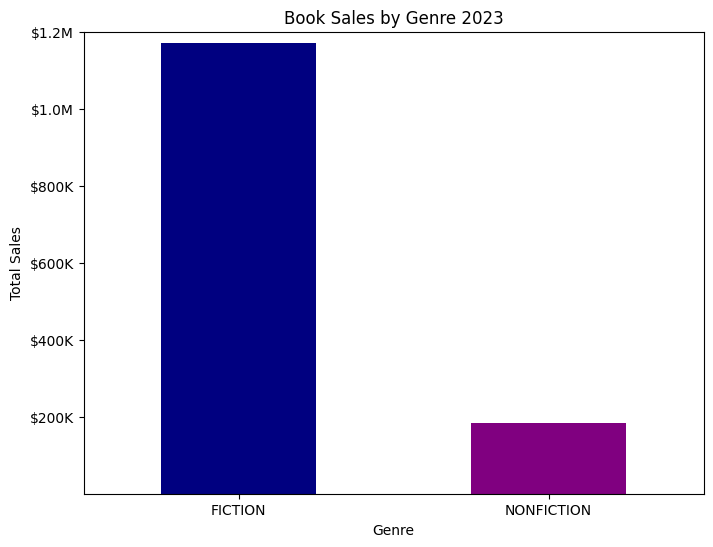

In [42]:
# Gross sales numbers for fiction and non-fiction book sales:
# grouped_data = df.groupby('Category')['Value'].sum()
sales_grouped_by = Full_Book_Details_mod2.groupby('Master_Genre')['gross_sales'].sum()

#change orientation of graph and dollar ticks
def currency(x,pos):
    if x >=1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

#plotting the graph with distinct colors
fig, ax = plt.subplots(figsize=(8,6))
ax = sales_grouped_by.plot(kind='bar', color=['navy','purple'], ax=ax)
labels = ax.get_xticklabels()

#arranging labels: 
plt.setp(labels,
          rotation = 0,
          horizontalalignment='center',)
ax.set(ylim=[10,1200000],
       ylabel='Total Sales', xlabel='Genre',
       title='Book Sales by Genre 2023')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_Maser_Genre_Booksales.png')
plt.show()

In [43]:
# I wanted to compare the gross sales of the cleaned data and the orignal book sales data set. See the below 2 code cells. 

Full_Book_Details_mod2.groupby(['Publisher_'], sort=True)['gross_sales'].sum()

Publisher_
AMAZON DIGITAL SERVICES   INC           532114.44
HACHETTE BOOK GROUP                     157115.50
HARPERCOLLINS CHRISTIAN PUBLISHING        3271.36
HARPERCOLLINS PUBLISHERS                109754.80
HARPERCOLLINS PUBLISHING                  2157.75
MACMILLAN                                28133.84
PENGUIN GROUP  USA  LLC                 252995.99
RANDOM HOUSE LLC                        230590.87
SIMON AND SCHUSTER DIGITAL SALES INC     38389.59
Name: gross_sales, dtype: float64

In [44]:
BS.groupby(['Publisher_'],sort=True)['gross_sales'].sum()

Publisher_
AMAZON DIGITAL SERVICES   INC           729809.01
HACHETTE BOOK GROUP                     229790.83
HARPERCOLLINS CHRISTIAN PUBLISHING        3559.45
HARPERCOLLINS PUBLISHERS                214130.43
HARPERCOLLINS PUBLISHING                  4718.01
MACMILLAN                                53927.06
PENGUIN GROUP  USA  LLC                 356362.47
RANDOM HOUSE LLC                        315975.37
SIMON AND SCHUSTER DIGITAL SALES INC     78313.92
Name: gross_sales, dtype: float64

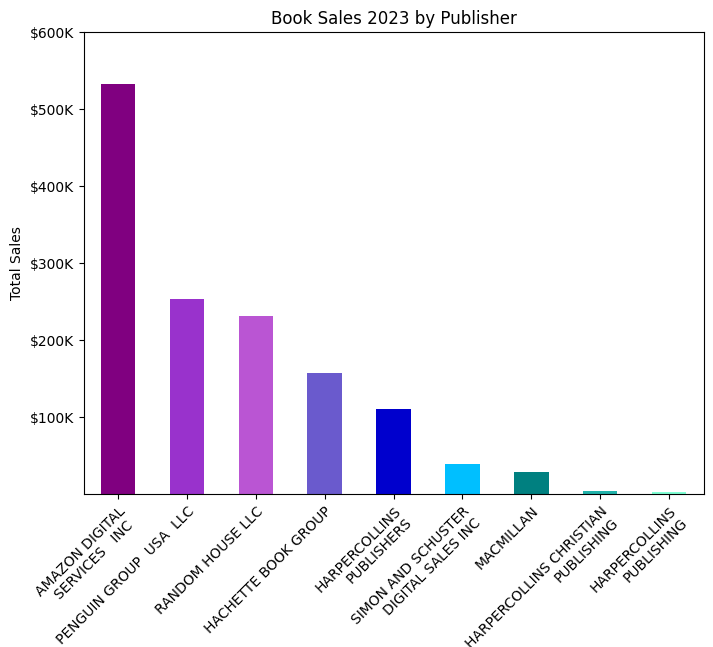

In [45]:
#sales by publisher graphed out
sales_by_publisher_grouped_by = Full_Book_Details_mod2.groupby('Publisher_')['gross_sales'].sum()

#assigning color function in a scheme for the larger graphs
colors = ['purple','darkorchid','mediumorchid','slateblue','mediumblue','deepskyblue','teal','lightseagreen','aquamarine','mediumspringgreen','lime','green','greenyellow','gold','darkorange','crimson','mediumvioletred']

#plotting the graph using the above color scheme: 
fig, ax = plt.subplots(figsize=(8,6))
sales_by_publisher_grouped_by.sort_values(ascending=False).plot(kind='bar', color=colors)

#adjusting the labels
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right',
          wrap=True)
ax.set(ylim=[10,600000],
       ylabel='Total Sales', xlabel='Publisher',
       title='Book Sales 2023 by Publisher')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_Booksales_by_Publisher.png')
plt.show()

In [46]:
#Audio book sales numbers and units sold -- high seller in dataset, wanted to graph audiobook sales to determine if the extra expense of this format would be beneficial for authors to offer an audiobook format for thier book.

# Group by 'type' and calculate the total sales for 'audiobook'
total_audiobook_sales = Full_Book_Details_mod2[Full_Book_Details_mod2['Trope_8'] == 'AUDIOBOOK'].groupby('Trope_8')['gross_sales'].sum().iloc[0]
print(f"Total sales for audiobooks: {total_audiobook_sales}")

total_audiobook_units = Full_Book_Details_mod2[Full_Book_Details_mod2['Trope_8'] == 'AUDIOBOOK'].groupby('Trope_8')['units_sold'].sum().iloc[0]
print(f"Total units sold for audiobooks: {total_audiobook_units}")

Total sales for audiobooks: 651099.49
Total units sold for audiobooks: 2899344


In [47]:
#designation to separate fiction and nonfiction sales to graph below. 
fiction = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Genre']== 'FICTION']
nonfiction = Full_Book_Details_mod2.loc[Full_Book_Details_mod2['Master_Genre']=='NONFICTION']
# fiction.head(3)

In [48]:
# sum totals to determine y-axis limits for graphs.
Full_Book_Details_mod2.groupby(['Master_Sub_Genre'], sort=True)['gross_sales'].sum()

Master_Sub_Genre
BIOGRAPHY           108517.97
CHILDRENS           185201.31
CLASSICS              9793.80
CONTEMPORARY         15028.40
COOKBOOKS             1864.03
FANTASY               5743.20
HISTORICAL           29420.84
HISTORY              26502.27
HORROR               60925.19
LITERARY FICTION    151864.65
MEMOIR               26771.21
MYSTERY             170739.60
RELIGION              1064.44
ROMANCE             389075.26
SCIENCE              11007.03
SCIENCE FICTION     145234.10
SELFHELP             15770.84
Name: gross_sales, dtype: float64

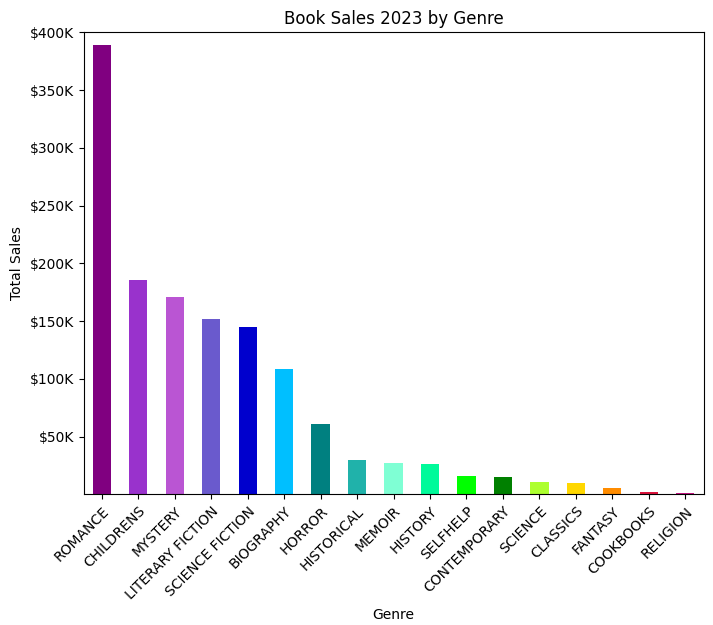

In [49]:
# chart ALL book sales by sub-genre
# #grouped_data = df.groupby('Category')['Value'].sum()
Sub_genres_grouped_by = Full_Book_Details_mod2.groupby('Master_Sub_Genre')['gross_sales'].sum()

fig, ax = plt.subplots(figsize=(8,6))
Sub_genres_grouped_by.sort_values(ascending=False).plot(kind='bar', color=colors)
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right',
          wrap=True)
ax.set(ylim=[10,400000],
       ylabel='Total Sales', xlabel='Genre',
       title='Book Sales 2023 by Genre')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_Genre_Booksales.png')
plt.show()

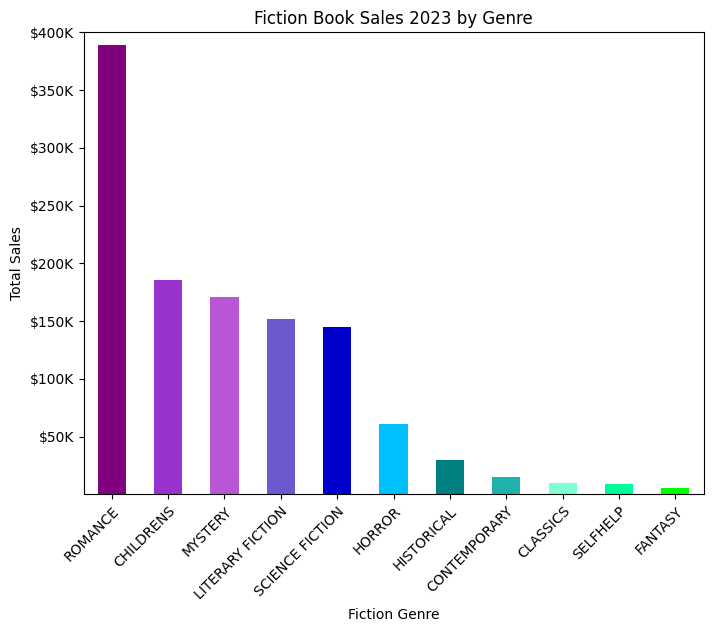

In [50]:
# chart FICTION book sales by master genre and sub genre
Sub_genres_grouped_by = fiction.groupby('Master_Sub_Genre')['gross_sales'].sum()

fig, ax = plt.subplots(figsize=(8,6))
Sub_genres_grouped_by.sort_values(ascending=False).plot(kind='bar', color=colors)
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right',
          wrap=True)
ax.set(ylim=[10,400000],
       ylabel='Total Sales', xlabel='Fiction Genre',
       title='Fiction Book Sales 2023 by Genre')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_Fiction_Genre_Booksales.png')
plt.show()

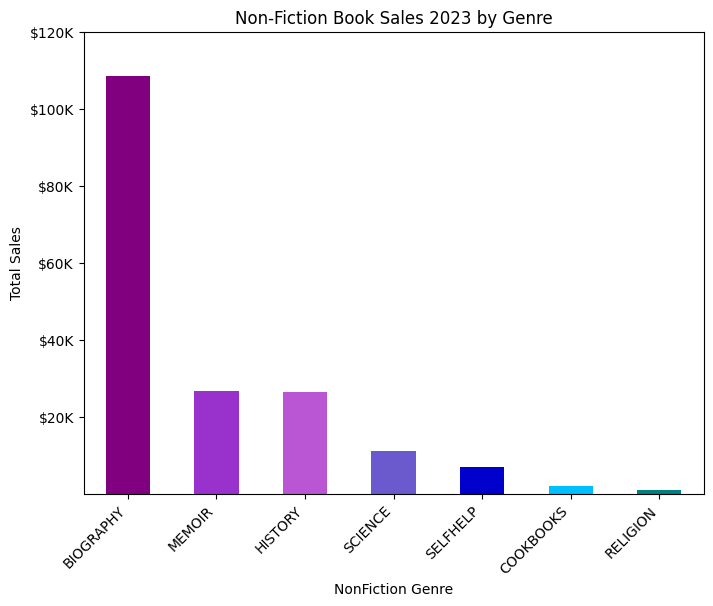

In [51]:
# chart NONFICTION book sales by sub-genre
Sub_genres_grouped_by = nonfiction.groupby('Master_Sub_Genre')['gross_sales'].sum()

fig, ax = plt.subplots(figsize=(8,6))
Sub_genres_grouped_by.sort_values(ascending=False).plot(kind='bar', color=colors)
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right')
ax.set(ylim=[10,120000],
       ylabel='Total Sales', xlabel='NonFiction Genre',
       title='Non-Fiction Book Sales 2023 by Genre')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_NonFiction_Genre_Booksales.png')
plt.show()

In [52]:
# totals for romance trope 1 for y-axis limit
Fiction_Romance.groupby(['Trope_1'], sort=True)['gross_sales'].sum()

Trope_1
ADULT           134566.15
CLASSICS          3057.99
CONTEMPORARY      2992.50
FANTASY         142436.86
HISTORICAL        1210.68
NOVELS            5571.42
THRILLER          1772.95
YOUNG ADULT      97466.71
Name: gross_sales, dtype: float64

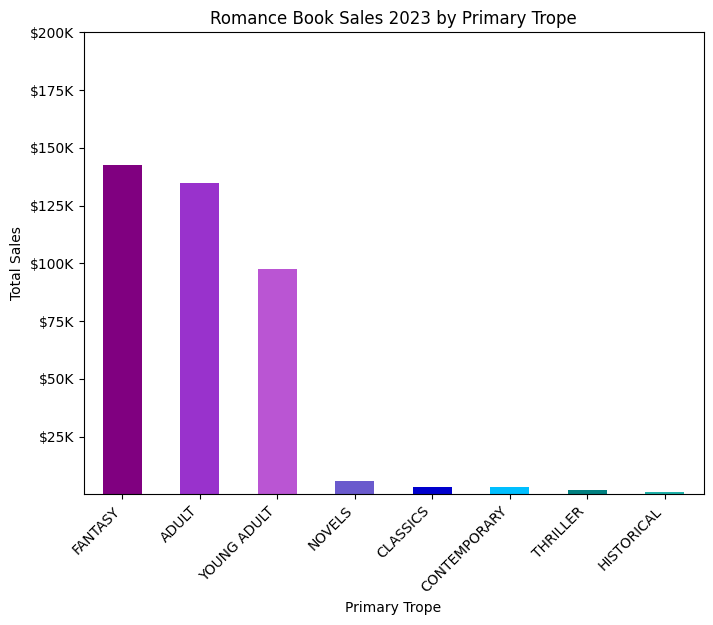

In [53]:
# chart ROMANCE book sales by TROPE 1
Sub_genres_grouped_by = Fiction_Romance.groupby('Trope_1')['gross_sales'].sum()

#plotting using prior colors 
fig, ax = plt.subplots(figsize=(8,6))
Sub_genres_grouped_by.sort_values(ascending=False).plot(kind='bar', color=colors)
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right')
ax.set(ylim=[10,200000],
       ylabel='Total Sales', xlabel='Primary Trope',
       title='Romance Book Sales 2023 by Primary Trope')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_Romance_Genre_Booksales_by_Trope.png')
plt.show()

In [54]:
#totals for trope 2 of ROMANCE for y-axis limits. 
Fiction_Romance.groupby(['Trope_2'], sort=True)['gross_sales'].sum()

Trope_2
AFRICA                2992.50
CHICKLIT             33272.41
CLASSICS             10789.27
CONTEMPORARY         56082.80
DYSTOPIA              3213.21
FANTASY              18598.34
GRAPHICNOVELS          343.85
HISTORICAL           42753.30
HORROR                2492.84
HUMOR                  997.50
INDIANLITERATURE       146.52
LGBT                  1082.90
MAGICAL REALISM        873.68
MUSIC                20309.55
MYSTERY              29788.25
MYTHOLOGY              668.25
NEWADULT             28725.80
PARANORMAL            1262.55
PLAYS                 3057.99
SCIENCE FICTION        133.65
URBAN                  792.76
VAMPIRES              7200.15
YOUNG ADULT         123010.41
ZOMBIES                486.78
Name: gross_sales, dtype: float64

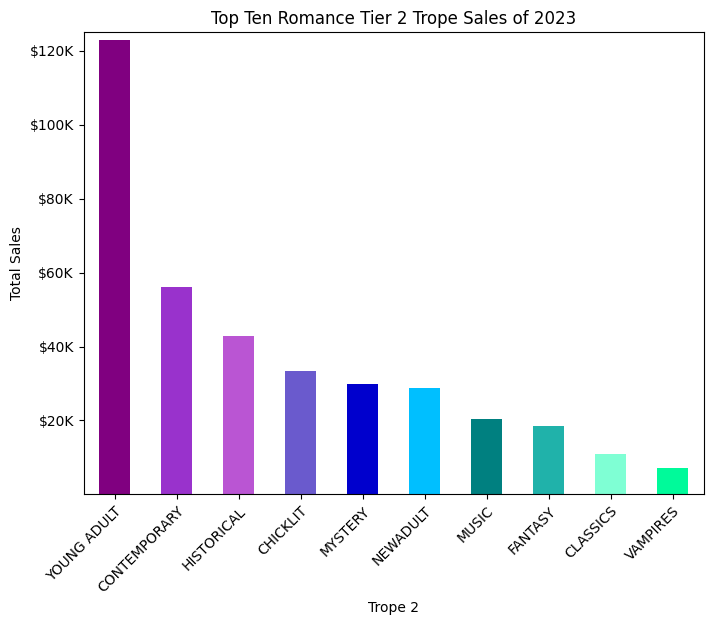

In [55]:
# chart ROMANCE book sales by top ten sales of TROPE_2 
grouped_df = Fiction_Romance.groupby('Trope_2')['gross_sales'].sum()

# Plot the to ten values in trope/theme 2 romance fiction
top_ten_t2_romance = grouped_df.sort_values(ascending=False).head(10) 
#plotting using same colors theme from above
fig, ax = plt.subplots(figsize=(8,6))
top_ten_t2_romance.plot(kind='bar', color=colors)
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right',
          wrap=True)
ax.set(ylim=[10,125000],
       ylabel='Total Sales', xlabel='Trope 2',
       title='Top Ten Romance Tier 2 Trope Sales of 2023')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_Romance_Genre_Booksales_by_Trope2.png')
plt.show()

# FINAL ANALYSIS

⁜ The data comprised book sales from traditional publishers and Amazon digital as the publisher. Amazon as a digital publisher ($532,114) far outsold all traditional publishing houses, the highest grossing Traditional publisher was PENGUIN GROUP USA LLC ($252,995) which was outsold by Amazon Digital by 210%. Thereby showing that the popularity of digital books surpasses traditional book sales in this dataset. This was confirmed by using the raw data from Book_Sales dataset for sales numbers by pulisher prior to decreasing the data size for books that only met the parameters for this project. 

⁜ As indicated above digital book sales out-sold traditional books, another popular book format found in the dataset was audiobooks ($650,628 total sales & 2,864,568 units sold). These numbers would suggest not only supplying an e-book format for self-publishing authors, but expanding to include audio books would benefit the author in terms of sales potential. This does come at an expense and it would be up to the author on whether or not to expand sales to this format.  

⁜ Overall, Fiction outsold Nonfiction in 2023 by nearly $1 million dollars. 

⁜ Of fiction sales, the highest seller was Romance at $389,075, out selling the next highest genre, Childrens, at $185,201, followed by Mystery $170,739 and Literary fiction $151,864.  

⁜ Romance sales were then broken out further into the highest selling tropes: Fantasy ($556,554), Young Adult ($226,873), and Adult ($224,378). 

⁜ Please visit the following link to access the Tableau Dashboard created with this data: https://public.tableau.com/views/PublishMe-ReleaseAssistant2023BookSalesbyGenreTrope/BookSales2023?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link 

⁜ The Tableau Dashboard above will also allow authors access to filter the data based Genre to determine sales data for thier preferred writing genre. This data can also be drilled down to include the tropes based on the main genre for additional themes(tropes) the author may want explore when crafting thier novel. 